# TIME SERIES ANALYSIS

# Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

## DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.


The data was organized  by Dr. Sina Kashuk at CUSP.
You can get it from the github repo (use the download link to download it live in your notebook). 
It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


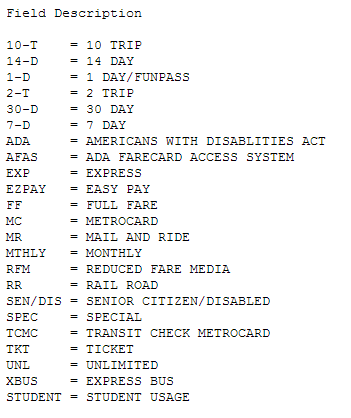

In [1]:
from IPython.display import Image
Image(filename = "Ridetypes.png")

## Each time series (per station, per ticket type) contains the number of swipes per week for 194 weeks from 05/21/2010 to 02/21/2014. 

The data are available to you as a *python data cube*. you can load it as 

```
np.load(“MTA_Fare.npy")
```

and you will end up with a python numpy array of 
shape (600, 23, 194)




In [11]:
import pylab as pl
import pandas as pd
import os
import numpy as np
import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
mtaRides= np.load("MTA_Fare.npy")
mtaRides.shape

(600, 23, 194)

## Task 1: Event Detection

In [3]:
mta_allstationsum = np.nansum(mtaRides, axis=0)
print (mta_allstationsum.shape)

(23, 194)


In [4]:
collapsed = np.nansum(mta_allstationsum, axis = 0)
print(collapsed.shape)

(194,)


In [5]:
data = pd.DataFrame(collapsed)
data.head()

,0
0,26716631
1,29262313
2,29597575
3,29383978
4,29182176


In [37]:
weeks = pd.date_range(start = "05/28/2010",periods=194,freq="W-FRI")
weeks

DatetimeIndex(['2010-05-28', '2010-06-04', '2010-06-11', '2010-06-18',
               '2010-06-25', '2010-07-02', '2010-07-09', '2010-07-16',
               '2010-07-23', '2010-07-30',
               ...
               '2013-12-06', '2013-12-13', '2013-12-20', '2013-12-27',
               '2014-01-03', '2014-01-10', '2014-01-17', '2014-01-24',
               '2014-01-31', '2014-02-07'],
              dtype='datetime64[ns]', length=194, freq='W-FRI')

In [38]:
data.index = weeks
data.columns = ["Sum_Rides"]
data.head()

,Sum_Rides
2010-05-28,26716631
2010-06-04,29262313
2010-06-11,29597575
2010-06-18,29383978
2010-06-25,29182176


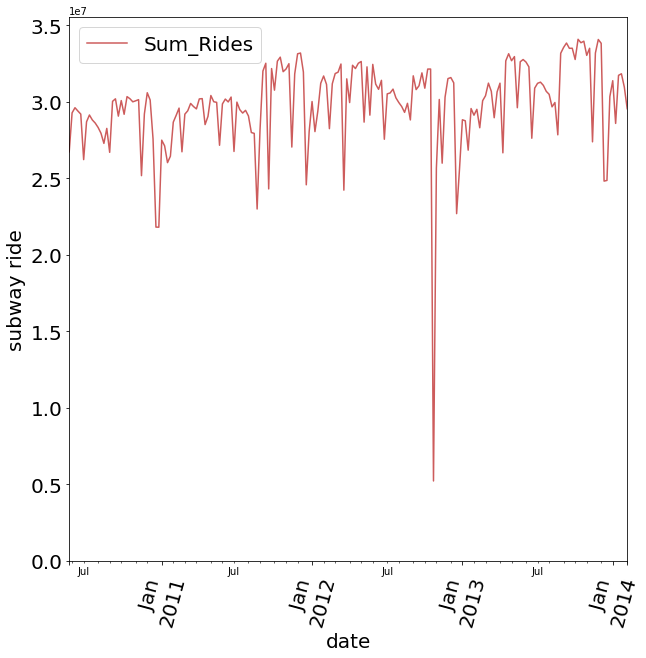

In [39]:
ax = data.plot(figsize=(10,10), color="IndianRed")

pl.xticks(rotation=75, fontsize=20)
pl.yticks(fontsize=20)
pl.ylim(-20, pl.ylim()[1])
pl.legend(fontsize=20)
pl.xlabel("date", fontsize=20)
pl.ylabel("subway ride", fontsize=20)

In [40]:
print ("mean subway ride by week {:.2f}".format(data["Sum_Rides"].mean()))
print ("stdev subway ride by week {:.2f}".format(data["Sum_Rides"].std()))
thresholds = [data["Sum_Rides"].mean() + 3 * data["Sum_Rides"].std(), 
              data["Sum_Rides"].mean() - 3 * data["Sum_Rides"].std()]
print ("3-sigma thresholds: {:.2f}--{:.2f}".format(*thresholds))
print ("earliest datapoint", min(data.index))

mean subway ride by week 29778001.61
stdev subway ride by week 2991755.02
3-sigma thresholds: 38753266.66--20802736.55
('earliest datapoint', Timestamp('2010-05-28 00:00:00', offset='W-FRI'))


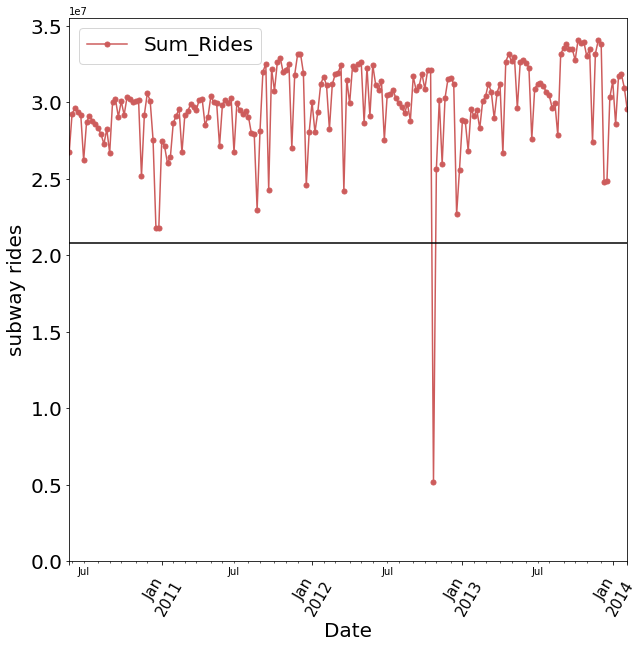

In [41]:
ax = data.plot(figsize=(10,10), style=".-", ms=10, color="IndianRed")
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[1], thresholds[1]], color='k')
pl.xticks(rotation=60, fontsize=15)
pl.yticks(fontsize=20)
pl.ylim(-20, pl.ylim()[1])
pl.legend(fontsize=20)
pl.ylabel("subway rides", fontsize=20)
pl.xlabel("Date", fontsize=20)

In [42]:
data.loc[(data.Sum_Rides < thresholds[1])]

,Sum_Rides
2012-10-26,5215466


##### The Significant drop inthe ridership of subway is in October 29 2012, when Hurricane Sandy attacked New York. For detailed infromation please refer to the following link. 

[see: http://www.cnn.com/2013/07/13/world/americas/hurricane-sandy-fast-facts/index.html]("http://www.cnn.com/2013/07/13/world/americas/hurricane-sandy-fast-facts/index.html)

## Task 2: Stationarity

In [8]:
mtaRides = mtaRides.astype('float')
mtaRides[mtaRides == -1] = np.nan

In [9]:
mtaRides

array([[[  5.69610000e+04,   6.47030000e+04,   6.80020000e+04, ...,
           3.65270000e+04,   3.39290000e+04,   3.68240000e+04],
        [  1.73200000e+03,   2.08300000e+03,   2.10700000e+03, ...,
           1.26400000e+03,   1.17200000e+03,   1.23800000e+03],
        [  2.03000000e+02,   2.76000000e+02,   2.45000000e+02, ...,
           1.86000000e+02,   1.67000000e+02,   1.67000000e+02],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [             nan,              nan,              nan, ...,
           1.12100000e+03,   1.37700000e+03,   7.12000000e+02]],

       [[  1.62100000e+04,   2.01790000e+04,   2.17690000e+04, ...,
                      nan,              nan,              nan],
        [  5.03000000e+02,   6.47000000e+02,   6.65000000e+0

In [10]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [11]:
print (mtaRides.shape)
mta_allstationsum = np.nansum(mtaRides, axis=0)
print (mta_allstationsum.shape)

(600, 23, 194)
(23, 194)


In [14]:
ridership = pd.DataFrame(mta_allstationsum)
ridership = ridership.transpose()
ridership.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,11494615.0,530524.0,47801.0,186551.0,46808.0,3697443.0,8551937.0,10063.0,333197.0,512032.0,...,123134.0,790110.0,59809.0,28221.0,0.0,124693.0,21060.0,6128.0,358.0,0.0
1,12526859.0,583533.0,51486.0,199229.0,64353.0,3981808.0,9486394.0,11847.0,282755.0,578023.0,...,151948.0,908068.0,69209.0,32333.0,0.0,121713.0,21670.0,6120.0,474.0,0.0
2,12766627.0,586194.0,51636.0,199668.0,56994.0,4033030.0,9476538.0,12277.0,302028.0,615537.0,...,151538.0,914124.0,69574.0,32618.0,0.0,122181.0,21433.0,6490.0,465.0,0.0
3,12653675.0,562602.0,52063.0,196389.0,37429.0,4032753.0,9450081.0,11221.0,305513.0,606270.0,...,147094.0,902549.0,68099.0,32404.0,0.0,122051.0,21630.0,6590.0,484.0,0.0
4,12809694.0,548858.0,51153.0,194883.0,35210.0,3925446.0,9294002.0,10515.0,335780.0,563446.0,...,137888.0,855573.0,66377.0,31933.0,176.0,119776.0,20297.0,6313.0,452.0,0.0


In [20]:
ridership.columns = ridetype
ridership

,10t,14d,1d,2t,30d,7d,ada,afas,exp,ez,...,month,rfm,rr,sen,spec,tcmc,t,umlim,xbus,stud
0,11494615.0,530524.0,47801.0,186551.0,46808.0,3697443.0,8551937.0,10063.0,333197.0,512032.0,...,123134.0,790110.0,59809.0,28221.0,0.0,124693.0,21060.0,6128.0,358.0,0.0
1,12526859.0,583533.0,51486.0,199229.0,64353.0,3981808.0,9486394.0,11847.0,282755.0,578023.0,...,151948.0,908068.0,69209.0,32333.0,0.0,121713.0,21670.0,6120.0,474.0,0.0
2,12766627.0,586194.0,51636.0,199668.0,56994.0,4033030.0,9476538.0,12277.0,302028.0,615537.0,...,151538.0,914124.0,69574.0,32618.0,0.0,122181.0,21433.0,6490.0,465.0,0.0
3,12653675.0,562602.0,52063.0,196389.0,37429.0,4032753.0,9450081.0,11221.0,305513.0,606270.0,...,147094.0,902549.0,68099.0,32404.0,0.0,122051.0,21630.0,6590.0,484.0,0.0
4,12809694.0,548858.0,51153.0,194883.0,35210.0,3925446.0,9294002.0,10515.0,335780.0,563446.0,...,137888.0,855573.0,66377.0,31933.0,176.0,119776.0,20297.0,6313.0,452.0,0.0
5,11429783.0,455691.0,46852.0,175648.0,46849.0,3663144.0,8286803.0,10282.0,346683.0,540555.0,...,111425.0,730531.0,54034.0,27469.0,1.0,113699.0,19800.0,6158.0,458.0,0.0
6,12346877.0,518187.0,48963.0,188467.0,60225.0,3918104.0,9271413.0,11361.0,310387.0,611962.0,...,140932.0,838630.0,65635.0,32065.0,2.0,114803.0,20816.0,6793.0,535.0,0.0
7,12576759.0,513412.0,49629.0,188090.0,47439.0,4028251.0,9306575.0,10950.0,345722.0,653871.0,...,138075.0,845227.0,65351.0,32159.0,3.0,120293.0,21497.0,7182.0,527.0,0.0
8,12437115.0,512192.0,49030.0,186822.0,32084.0,4030717.0,9145852.0,10723.0,348569.0,658757.0,...,136229.0,832235.0,64066.0,31284.0,0.0,123578.0,21620.0,7116.0,503.0,0.0
9,12431257.0,522569.0,50376.0,190528.0,52171.0,4032340.0,8906117.0,10574.0,364363.0,651734.0,...,134701.0,823236.0,63006.0,31600.0,4358.0,125819.0,21488.0,7373.0,506.0,0.0


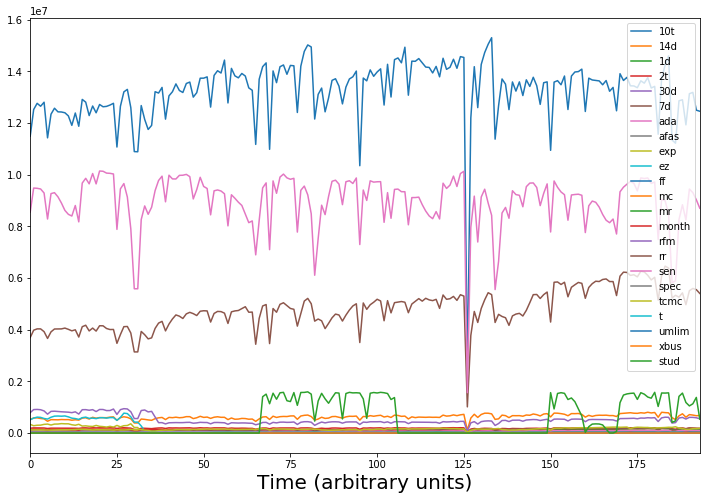

In [16]:
ridership.plot(figsize=(12,8))
plt.xlabel("Time (arbitrary units)", fontsize=20)
plt.legend(fontsize=10)

##### Fig1: time series plot of the orginal data of 23 different ridership type

In [23]:
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [66]:
def plotting_ridetype(item):
    
    fig = pl.figure(figsize=(8,5))
    ax = fig.add_subplot(111)
    
    ax.plot(np.arange(len(ridership[item])), ridership[item], label="original")
    ax.plot(np.arange(len(ridership[item])), pd.rolling_mean(ridership[item], 10), label="rolling mean")
    ax.set_title("non-stationary mean (rolling mean, window 10 dp)", fontsize=30)
    pl.xlabel("weeks since 2010-05-21", fontsize=20)
    pl.ylabel("Swipes", fontsize=20)
    pl.legend(fontsize=10)

    #rolling standard deviation, window 10
    pl.figure()
    pd.rolling_std(ridership[item], 10).plot(figsize=(8,5), 
                                         label="Rolling standard deviation")
    ax.set_title("variance (rolling stdev,window 10 dp)", fontsize=20)
    pl.xlabel("Weeks since 2010-05-21", fontsize=20)
    pl.ylabel("Swipes", fontsize=20)
    pl.legend(fontsize=10)

    print ("The first ten weeks of " + item + "\n", 
           ridership[item].dropna().head(), "\n", 
           "the last ten weeks of " + item + "\n",
           ridership[item].dropna().tail())
    
    print("ratio of usage in the first 10 and last 10 weeks:{}"\
          .format(pd.rolling_mean(ridership[item], 10).dropna().head(10).sum()/pd.rolling_mean(ridership[item], 10).dropna().tail(10).sum()))

    print ("first ten rolling mean of" + item + "\n", 
           pd.rolling_mean(ridership[item], 10).dropna().head(), "\n", 
           "last ten rolling mean of" + item + "\n",
           pd.rolling_mean(ridership[item], 10).dropna().tail())
    pl.show()
    print('\n')

C:\Users\Hongkai\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  import sys
C:\Users\Hongkai\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()
  from ipykernel import kernelapp as app


The first ten weeks of 10t
 0    11494615.0
1    12526859.0
2    12766627.0
3    12653675.0
4    12809694.0
Name: 10t, dtype: float64 
 the last ten weeks of 10t
 189    11932970.0
190    13139360.0
191    13189610.0
192    12500756.0
193    12459947.0
Name: 10t, dtype: float64
ratio of usage in the first 10 and last 10 weeks:0.9524522285780894
first ten rolling mean of10t
 9     12347326.1
10    12438021.8
11    12413400.0
12    12328087.8
13    12301901.5
Name: 10t, dtype: float64 
 last ten rolling mean of10t
 189    12784792.4
190    12756491.7
191    12918506.7
192    12794971.1
193    12616472.2
Name: 10t, dtype: float64


C:\Users\Hongkai\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
C:\Users\Hongkai\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
C:\Users\Hongkai\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()


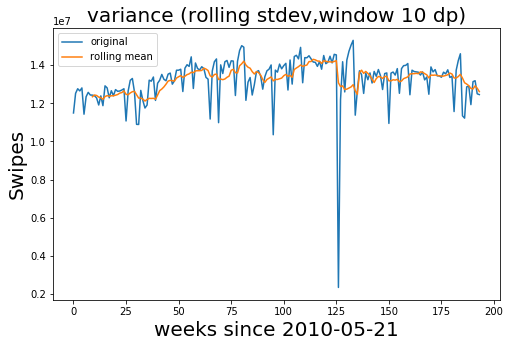

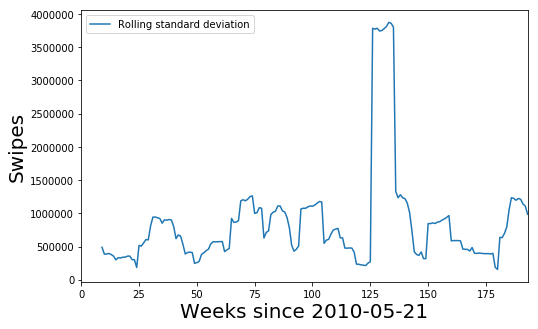



The first ten weeks of 14d
 0    530524.0
1    583533.0
2    586194.0
3    562602.0
4    548858.0
Name: 14d, dtype: float64 
 the last ten weeks of 14d
 189    613294.0
190    713717.0
191    695134.0
192    670228.0
193    679497.0
Name: 14d, dtype: float64
ratio of usage in the first 10 and last 10 weeks:0.7401229539211522
first ten rolling mean of14d
 9     533376.2
10    532186.0
11    525801.8
12    516787.3
13    511925.8
Name: 14d, dtype: float64 
 last ten rolling mean of14d
 189    691998.4
190    683817.6
191    692278.2
192    678913.9
193    667821.7
Name: 14d, dtype: float64


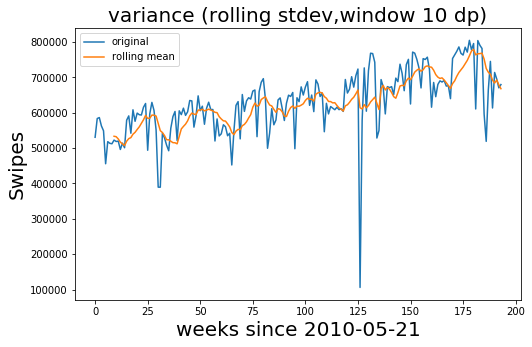

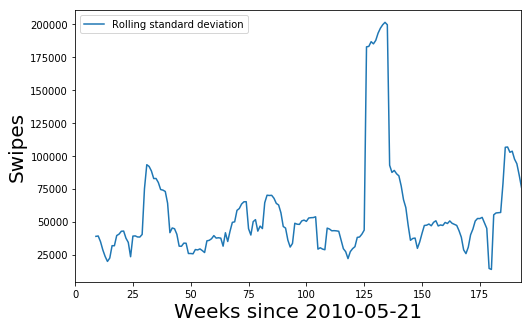



The first ten weeks of 1d
 0    47801.0
1    51486.0
2    51636.0
3    52063.0
4    51153.0
Name: 1d, dtype: float64 
 the last ten weeks of 1d
 189    51664.0
190    57208.0
191    58771.0
192    56525.0
193    55192.0
Name: 1d, dtype: float64
ratio of usage in the first 10 and last 10 weeks:0.8469007920665973
first ten rolling mean of1d
 9     49898.9
10    50014.6
11    49727.9
12    49310.8
13    49105.8
Name: 1d, dtype: float64 
 last ten rolling mean of1d
 189    57259.0
190    56608.7
191    57244.2
192    56377.4
193    55454.9
Name: 1d, dtype: float64


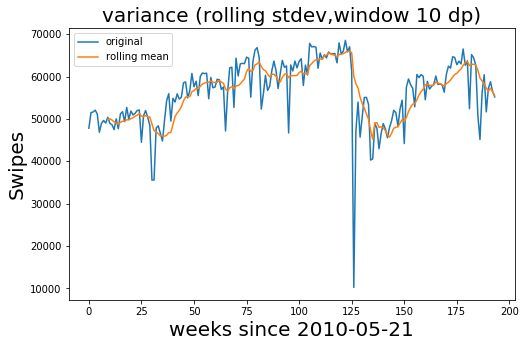

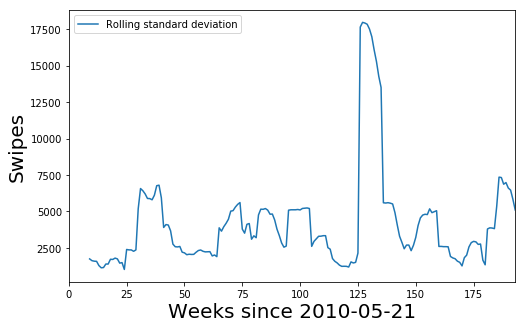



The first ten weeks of 2t
 0    186551.0
1    199229.0
2    199668.0
3    196389.0
4    194883.0
Name: 2t, dtype: float64 
 the last ten weeks of 2t
 189    168932.0
190    189564.0
191    184239.0
192    180029.0
193    179363.0
Name: 2t, dtype: float64
ratio of usage in the first 10 and last 10 weeks:1.0174632839559181
first ten rolling mean of2t
 9     190627.5
10    190856.4
11    189699.8
12    187936.9
13    186858.1
Name: 2t, dtype: float64 
 last ten rolling mean of2t
 189    181911.2
190    180559.5
191    181912.8
192    179860.5
193    178008.6
Name: 2t, dtype: float64


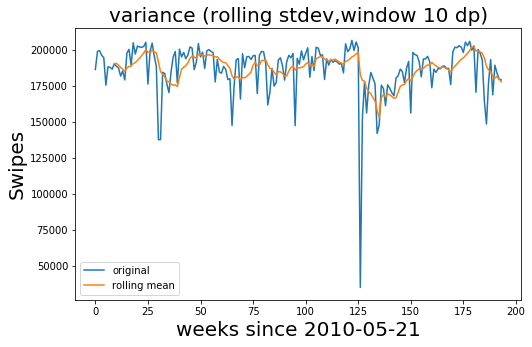

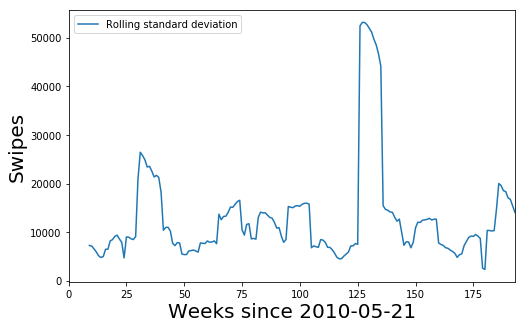



The first ten weeks of 30d
 0    46808.0
1    64353.0
2    56994.0
3    37429.0
4    35210.0
Name: 30d, dtype: float64 
 the last ten weeks of 30d
 189    43426.0
190    47804.0
191    61101.0
192    59400.0
193    46859.0
Name: 30d, dtype: float64
ratio of usage in the first 10 and last 10 weeks:0.8939789279827595
first ten rolling mean of30d
 9     47956.2
10    48741.4
11    46724.4
12    43959.0
13    43932.1
Name: 30d, dtype: float64 
 last ten rolling mean of30d
 189    49784.2
190    49070.7
191    52127.3
192    51639.6
193    49576.5
Name: 30d, dtype: float64


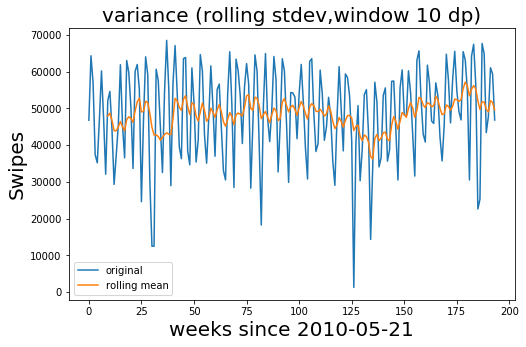

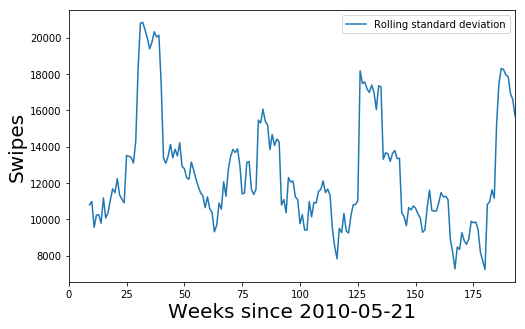



The first ten weeks of 7d
 0    3697443.0
1    3981808.0
2    4033030.0
3    4032753.0
4    3925446.0
Name: 7d, dtype: float64 
 the last ten weeks of 7d
 189    4970067.0
190    5511613.0
191    5599237.0
192    5551292.0
193    5405077.0
Name: 7d, dtype: float64
ratio of usage in the first 10 and last 10 weeks:0.6933913643249844
first ten rolling mean of7d
 9     3934303.6
10    3970926.0
11    3974298.6
12    3966722.6
13    3963185.5
Name: 7d, dtype: float64 
 last ten rolling mean of7d
 189    5632153.0
190    5580362.6
191    5625637.5
192    5573354.8
193    5467689.0
Name: 7d, dtype: float64


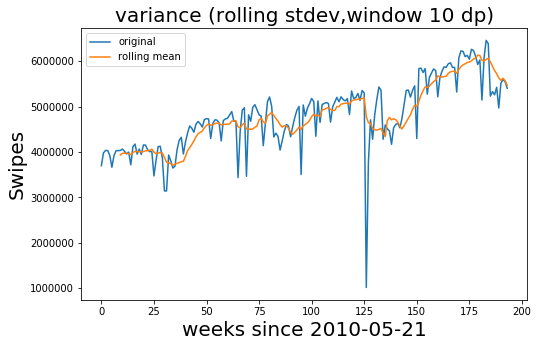

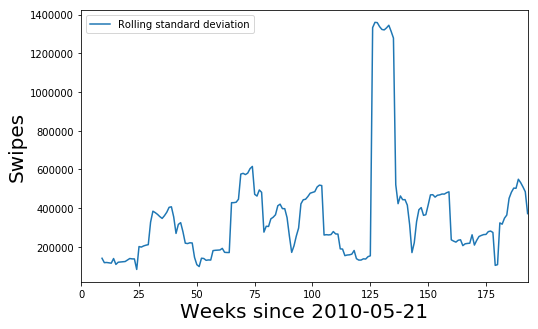



The first ten weeks of ada
 0    8551937.0
1    9486394.0
2    9476538.0
3    9450081.0
4    9294002.0
Name: ada, dtype: float64 
 the last ten weeks of ada
 189    8250357.0
190    9446638.0
191    9309259.0
192    9030595.0
193    8705150.0
Name: ada, dtype: float64
ratio of usage in the first 10 and last 10 weeks:1.0674213230368326
first ten rolling mean ofada
 9     9117571.2
10    9124481.8
11    9022678.5
12    8915251.8
13    8851225.3
Name: ada, dtype: float64 
 last ten rolling mean ofada
 189    8080450.4
190    8053298.5
191    8234697.6
192    8233333.2
193    8204367.5
Name: ada, dtype: float64


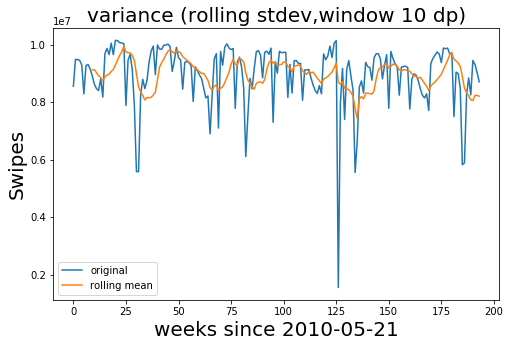

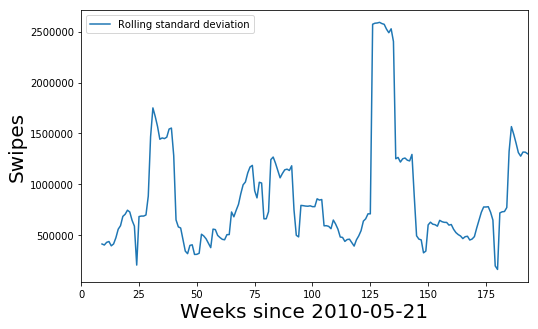



The first ten weeks of afas
 0    10063.0
1    11847.0
2    12277.0
3    11221.0
4    10515.0
Name: afas, dtype: float64 
 the last ten weeks of afas
 189    2.0
190    2.0
191    2.0
192    3.0
193    0.0
Name: afas, dtype: float64
ratio of usage in the first 10 and last 10 weeks:4823.780269058297
first ten rolling mean ofafas
 9     10981.3
10    11057.6
11    10942.7
12    10725.4
13    10580.2
Name: afas, dtype: float64 
 last ten rolling mean ofafas
 189    2.4
190    2.4
191    2.2
192    2.4
193    2.3
Name: afas, dtype: float64


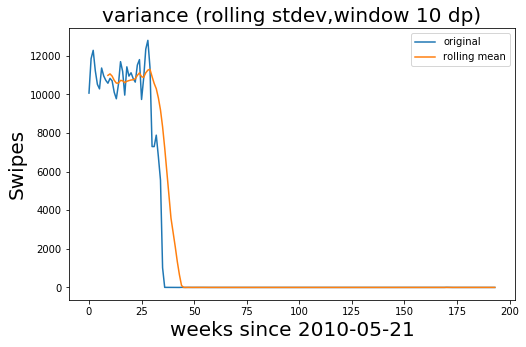

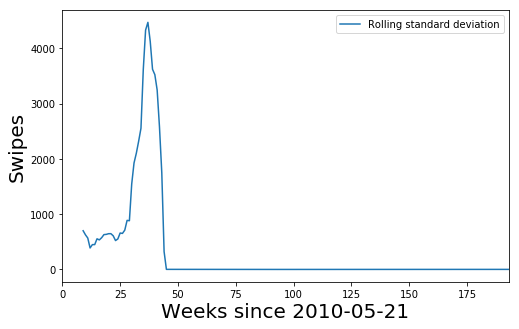



The first ten weeks of exp
 0    333197.0
1    282755.0
2    302028.0
3    305513.0
4    335780.0
Name: exp, dtype: float64 
 the last ten weeks of exp
 189    2.0
190    6.0
191    0.0
192    5.0
193    3.0
Name: exp, dtype: float64
ratio of usage in the first 10 and last 10 weeks:94866.75574712644
first ten rolling mean ofexp
 9     327499.7
10    329921.7
11    337337.3
12    339234.3
13    338819.6
Name: exp, dtype: float64 
 last ten rolling mean ofexp
 189    3.4
190    3.6
191    3.4
192    3.6
193    3.5
Name: exp, dtype: float64


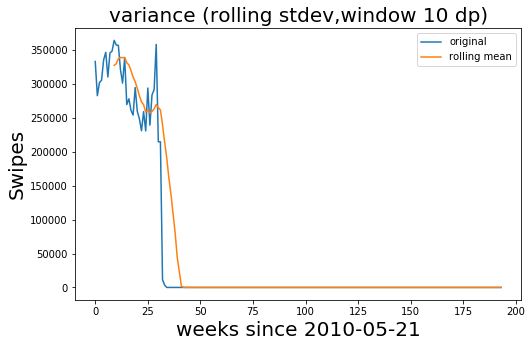

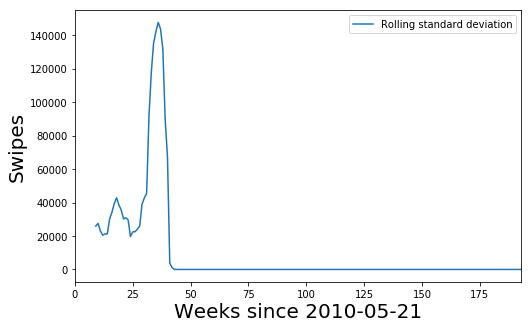



The first ten weeks of ez
 0    512032.0
1    578023.0
2    615537.0
3    606270.0
4    563446.0
Name: ez, dtype: float64 
 the last ten weeks of ez
 189    0.0
190    1.0
191    3.0
192    0.0
193    1.0
Name: ez, dtype: float64
ratio of usage in the first 10 and last 10 weeks:511771.3025210083
first ten rolling mean ofez
 9     599218.7
10    614143.4
11    619018.1
12    615071.9
13    610441.1
Name: ez, dtype: float64 
 last ten rolling mean ofez
 189    0.9
190    0.8
191    1.0
192    1.0
193    0.9
Name: ez, dtype: float64


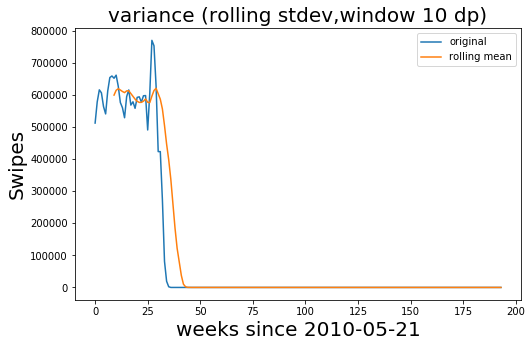

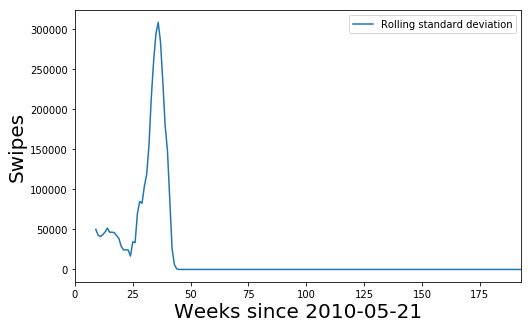



The first ten weeks of ff
 0    35898.0
1    44577.0
2    45842.0
3    44271.0
4    41636.0
Name: ff, dtype: float64 
 the last ten weeks of ff
 189    32794.0
190    39380.0
191    39216.0
192    36145.0
193    32138.0
Name: ff, dtype: float64
ratio of usage in the first 10 and last 10 weeks:1.14974870404526
first ten rolling mean offf
 9     41254.9
10    41790.3
11    41331.0
12    40723.5
13    40303.7
Name: ff, dtype: float64 
 last ten rolling mean offf
 189    34167.4
190    33828.8
191    35225.6
192    34834.7
193    33779.6
Name: ff, dtype: float64


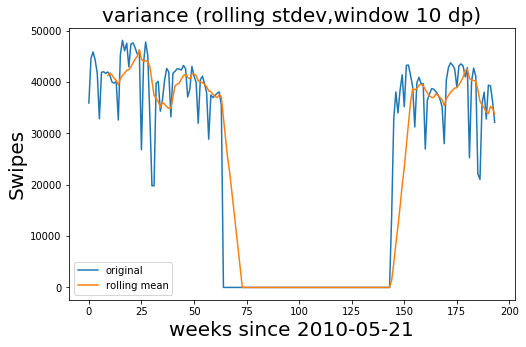

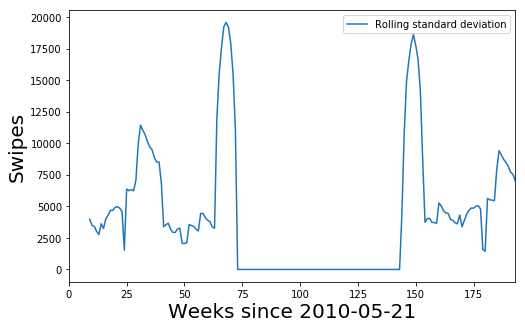



The first ten weeks of mc
 0    119881.0
1    143569.0
2    136383.0
3    134418.0
4    136351.0
Name: mc, dtype: float64 
 the last ten weeks of mc
 189    158766.0
190    180918.0
191    181019.0
192    168950.0
193    152362.0
Name: mc, dtype: float64
ratio of usage in the first 10 and last 10 weeks:0.8000162850178698
first ten rolling mean ofmc
 9     131889.7
10    132944.0
11    131174.8
12    129916.9
13    129063.0
Name: mc, dtype: float64 
 last ten rolling mean ofmc
 189    158433.4
190    159013.6
191    164556.4
192    163531.2
193    160053.5
Name: mc, dtype: float64


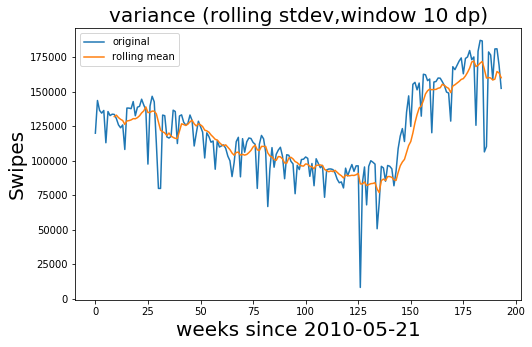

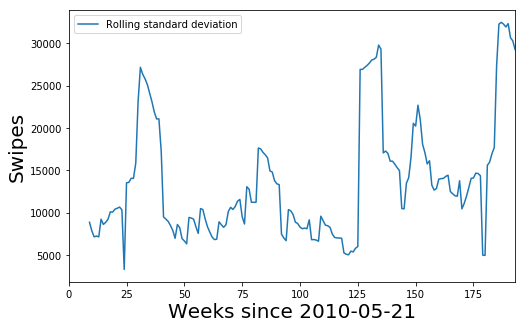



The first ten weeks of mr
 0     4.0
1     3.0
2    12.0
3     6.0
4     9.0
Name: mr, dtype: float64 
 the last ten weeks of mr
 189    126325.0
190    144746.0
191    152864.0
192    142804.0
193    146353.0
Name: mr, dtype: float64
ratio of usage in the first 10 and last 10 weeks:3.142852465993354e-05
first ten rolling mean ofmr
 9     5.8
10    5.6
11    6.0
12    5.2
13    5.1
Name: mr, dtype: float64 
 last ten rolling mean ofmr
 189    149666.4
190    147507.1
191    148937.8
192    145479.8
193    143752.6
Name: mr, dtype: float64


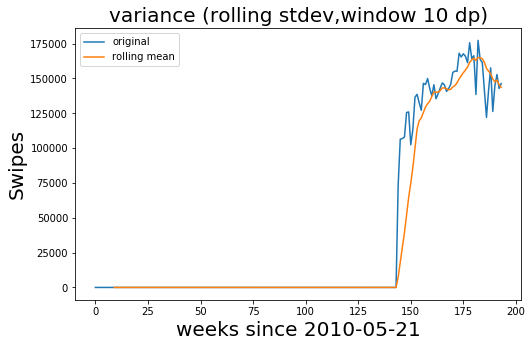

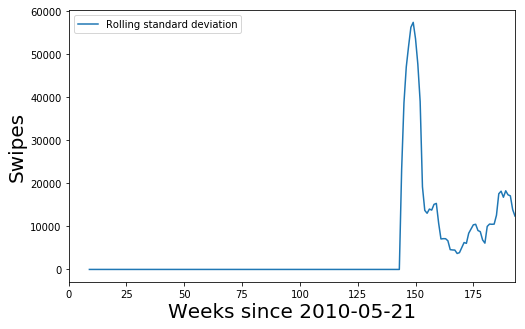



The first ten weeks of month
 0    123134.0
1    151948.0
2    151538.0
3    147094.0
4    137888.0
Name: month, dtype: float64 
 the last ten weeks of month
 189    73993.0
190    97828.0
191    87308.0
192    82733.0
193    74272.0
Name: month, dtype: float64
ratio of usage in the first 10 and last 10 weeks:1.6196332714302515
first ten rolling mean ofmonth
 9     137296.4
10    138431.2
11    136185.4
12    133147.9
13    131111.0
Name: month, dtype: float64 
 last ten rolling mean ofmonth
 189    79957.3
190    79996.3
191    82798.5
192    81647.3
193    79456.5
Name: month, dtype: float64


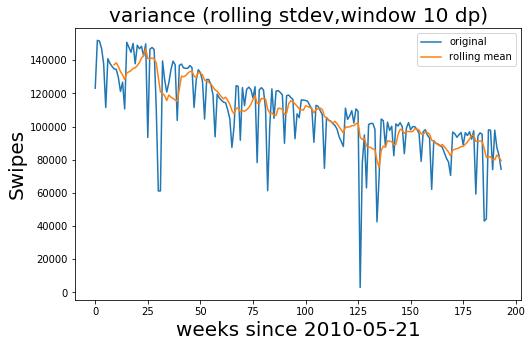

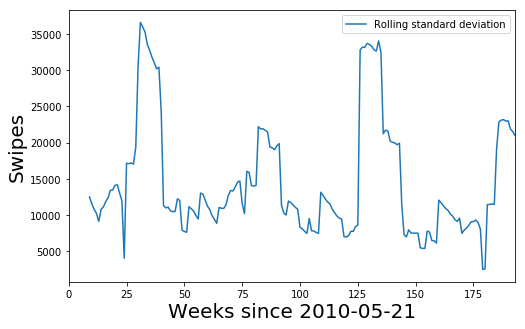



The first ten weeks of rfm
 0    790110.0
1    908068.0
2    914124.0
3    902549.0
4    855573.0
Name: rfm, dtype: float64 
 the last ten weeks of rfm
 189    541263.0
190    607106.0
191    606189.0
192    590849.0
193    552006.0
Name: rfm, dtype: float64
ratio of usage in the first 10 and last 10 weeks:1.512113866680655
first ten rolling mean ofrfm
 9     844028.3
10    846704.1
11    836627.0
12    824119.7
13    815964.5
Name: rfm, dtype: float64 
 last ten rolling mean ofrfm
 189    536784.2
190    538027.8
191    554020.3
192    554425.8
193    548287.9
Name: rfm, dtype: float64


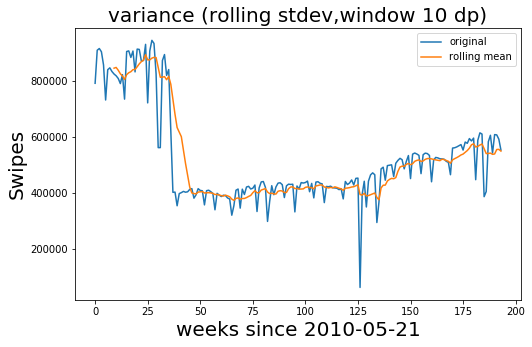

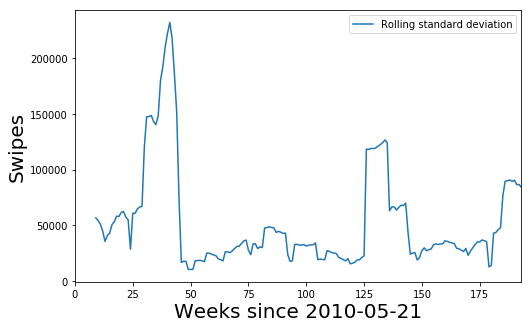



The first ten weeks of rr
 0    59809.0
1    69209.0
2    69574.0
3    68099.0
4    66377.0
Name: rr, dtype: float64 
 the last ten weeks of rr
 189    163216.0
190    194920.0
191    188230.0
192    179707.0
193    170854.0
Name: rr, dtype: float64
ratio of usage in the first 10 and last 10 weeks:0.3801394991915667
first ten rolling mean ofrr
 9     64516.0
10    64826.2
11    64197.5
12    63383.3
13    63007.3
Name: rr, dtype: float64 
 last ten rolling mean ofrr
 189    164927.4
190    165525.7
191    170863.3
192    170285.6
193    167287.4
Name: rr, dtype: float64


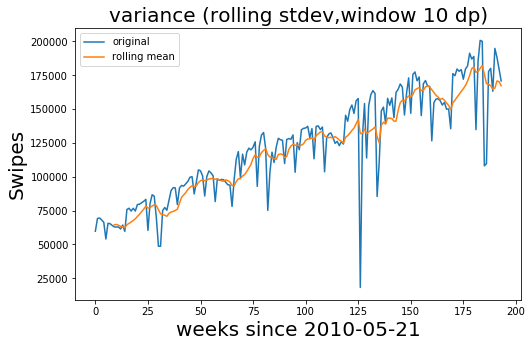

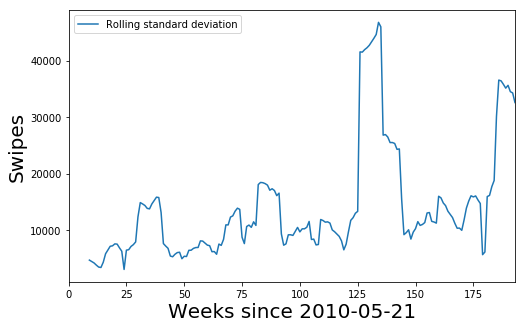



The first ten weeks of sen
 0    28221.0
1    32333.0
2    32618.0
3    32404.0
4    31933.0
Name: sen, dtype: float64 
 the last ten weeks of sen
 189     89354.0
190    103961.0
191    102124.0
192    101071.0
193     96887.0
Name: sen, dtype: float64
ratio of usage in the first 10 and last 10 weeks:0.3513228152402376
first ten rolling mean ofsen
 9     31208.6
10    31525.9
11    31426.6
12    31322.8
13    31417.4
Name: sen, dtype: float64 
 last ten rolling mean ofsen
 189    88764.8
190    88805.6
191    91572.1
192    91689.8
193    90798.2
Name: sen, dtype: float64


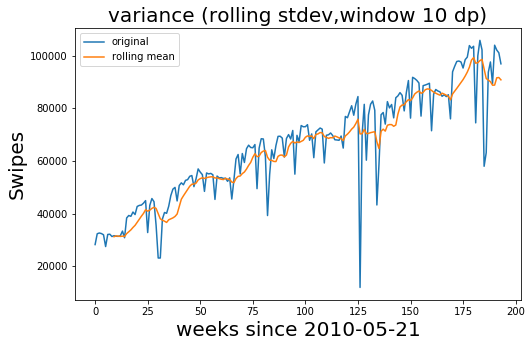

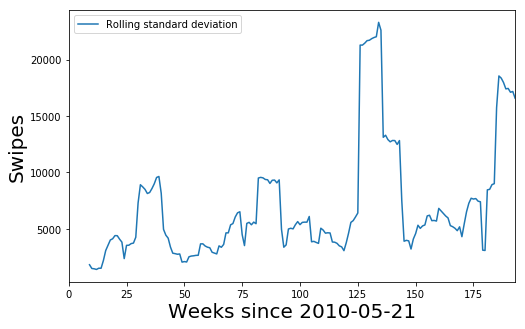



The first ten weeks of spec
 0      0.0
1      0.0
2      0.0
3      0.0
4    176.0
Name: spec, dtype: float64 
 the last ten weeks of spec
 189    25304.0
190    28836.0
191    30882.0
192    24702.0
193    26509.0
Name: spec, dtype: float64
ratio of usage in the first 10 and last 10 weeks:0.18407216282140634
first ten rolling mean ofspec
 9      454.0
10    1740.9
11    3128.6
12    4197.9
13    5515.0
Name: spec, dtype: float64 
 last ten rolling mean ofspec
 189    34488.8
190    34166.4
191    33841.5
192    32833.4
193    31862.8
Name: spec, dtype: float64


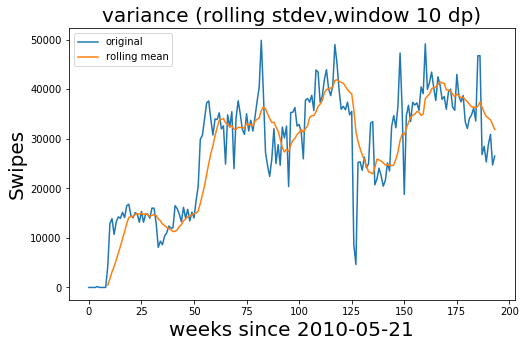

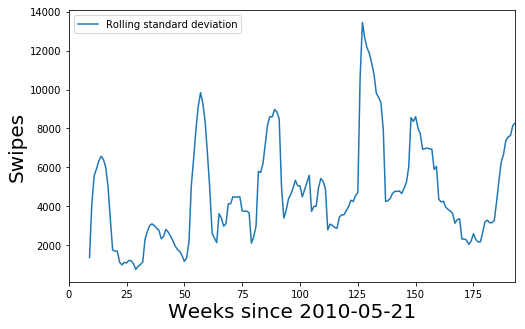



The first ten weeks of tcmc
 0    124693.0
1    121713.0
2    122181.0
3    122051.0
4    119776.0
Name: tcmc, dtype: float64 
 the last ten weeks of tcmc
 189    139163.0
190    138907.0
191    170980.0
192    168923.0
193    186362.0
Name: tcmc, dtype: float64
ratio of usage in the first 10 and last 10 weeks:0.6315417605665048
first ten rolling mean oftcmc
 9     120860.6
10    120940.9
11    121945.7
12    122751.3
13    124538.5
Name: tcmc, dtype: float64 
 last ten rolling mean oftcmc
 189    199910.4
190    194654.4
191    191531.8
192    187831.8
193    185191.2
Name: tcmc, dtype: float64


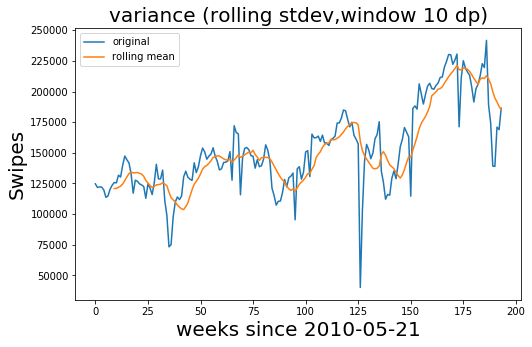

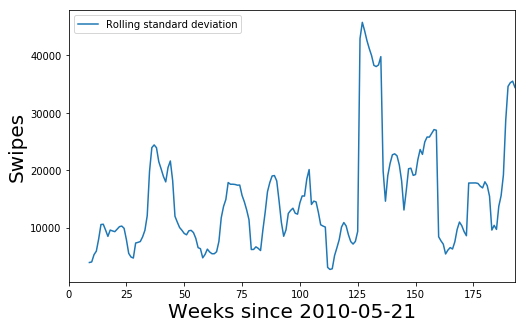



The first ten weeks of t
 0    21060.0
1    21670.0
2    21433.0
3    21630.0
4    20297.0
Name: t, dtype: float64 
 the last ten weeks of t
 189    10106.0
190    18249.0
191    23409.0
192    23736.0
193    24467.0
Name: t, dtype: float64
ratio of usage in the first 10 and last 10 weeks:0.9485274034603839
first ten rolling mean oft
 9     21131.1
10    21176.8
11    21167.9
12    21167.1
13    21173.3
Name: t, dtype: float64 
 last ten rolling mean oft
 189    21852.0
190    21390.1
191    21526.9
192    21524.1
193    21587.3
Name: t, dtype: float64


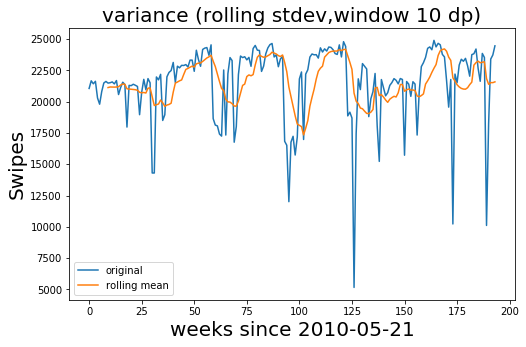

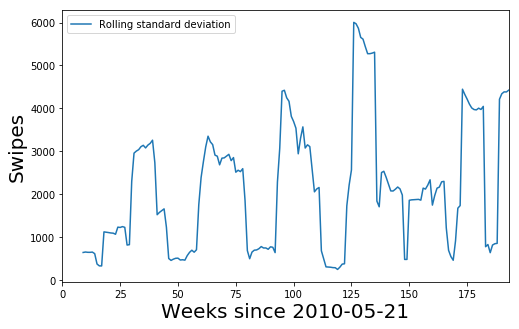



The first ten weeks of umlim
 0    6128.0
1    6120.0
2    6490.0
3    6590.0
4    6313.0
Name: umlim, dtype: float64 
 the last ten weeks of umlim
 189    2299.0
190    4065.0
191    5398.0
192    5759.0
193    6184.0
Name: umlim, dtype: float64
ratio of usage in the first 10 and last 10 weeks:1.233655777972982
first ten rolling mean ofumlim
 9     6626.3
10    6756.1
11    6878.3
12    6934.6
13    6963.0
Name: umlim, dtype: float64 
 last ten rolling mean ofumlim
 189    5458.6
190    5339.3
191    5339.8
192    5325.5
193    5361.1
Name: umlim, dtype: float64


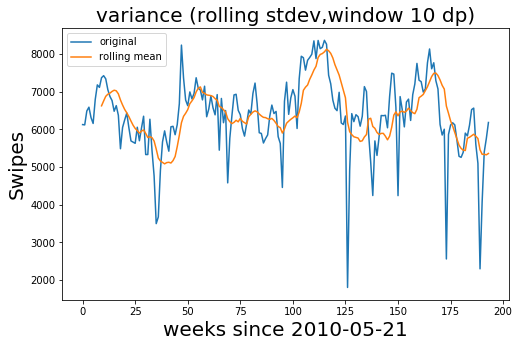

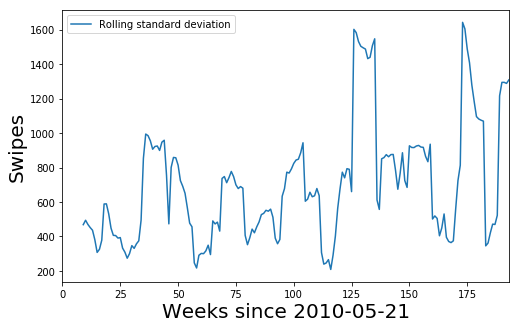



The first ten weeks of xbus
 0    358.0
1    474.0
2    465.0
3    484.0
4    452.0
Name: xbus, dtype: float64 
 the last ten weeks of xbus
 189    212.0
190    772.0
191    862.0
192    810.0
193    820.0
Name: xbus, dtype: float64
ratio of usage in the first 10 and last 10 weeks:0.5259089825033064
first ten rolling mean ofxbus
 9     476.2
10    489.8
11    489.0
12    480.1
13    477.8
Name: xbus, dtype: float64 
 last ten rolling mean ofxbus
 189    877.5
190    847.2
191    849.7
192    821.1
193    791.6
Name: xbus, dtype: float64


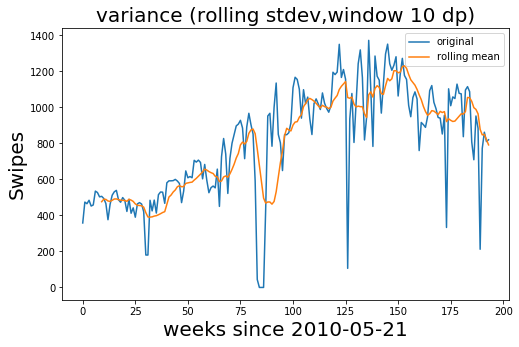

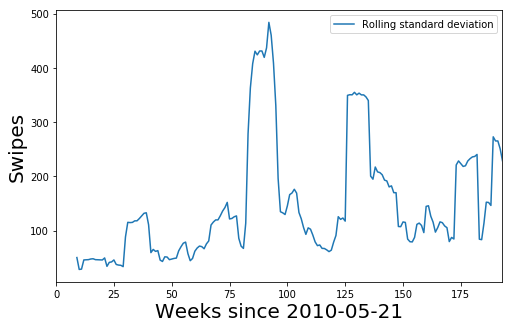



The first ten weeks of stud
 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: stud, dtype: float64 
 the last ten weeks of stud
 189    1182107.0
190    1050160.0
191    1132723.0
192    1379403.0
193     535018.0
Name: stud, dtype: float64
ratio of usage in the first 10 and last 10 weeks:0.0
first ten rolling mean ofstud
 9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
Name: stud, dtype: float64 
 last ten rolling mean ofstud
 189    1229125.7
190    1176480.6
191    1186881.3
192    1169743.8
193    1068539.6
Name: stud, dtype: float64


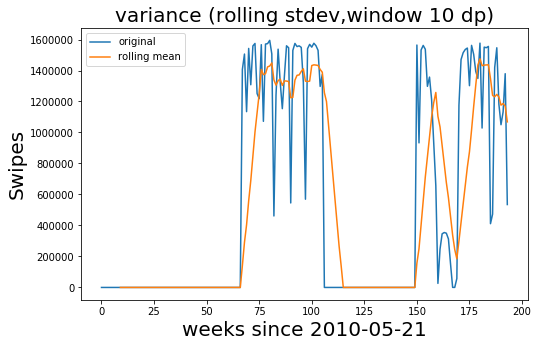

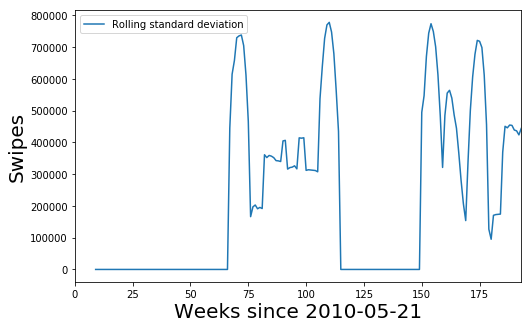

In [67]:
for item in ridetype:
    plotting_ridetype(item)

#### Ridership types that have steadily increased in popularity, and thier corresponding ratios of first ten weeks over  last ten weeks are listed as follows:
##### 14d: 0.7412; 
##### 7d: 0.6934
##### rr: 0.3801
##### sen: 0.3513

#### The ridership type that have steadily decreased in popularity is monthly card, with a ratio (first ten weeks/ last ten weeks) of 1.620.

## Task 3: Periodicity

In [68]:
mta_allsum = np.nansum(mtaRides, axis=1)
print (mta_allsum.shape)

(600, 194)


In [71]:
stations = pd.DataFrame(mta_allsum)
stations = stations.transpose()
stations.head()

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,126878.0,37306.0,6606.0,16378.0,18564.0,19987.0,12449.0,11091.0,10482.0,147187.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,149477.0,46464.0,6881.0,17408.0,19903.0,20625.0,13644.0,11659.0,11030.0,154826.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,152383.0,49359.0,7229.0,17595.0,19948.0,21225.0,13719.0,12037.0,10881.0,155958.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,160175.0,44849.0,5731.0,14242.0,16076.0,17412.0,11460.0,9809.0,9123.0,154914.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,162641.0,41509.0,7032.0,17589.0,20283.0,20909.0,14094.0,11944.0,10923.0,157628.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


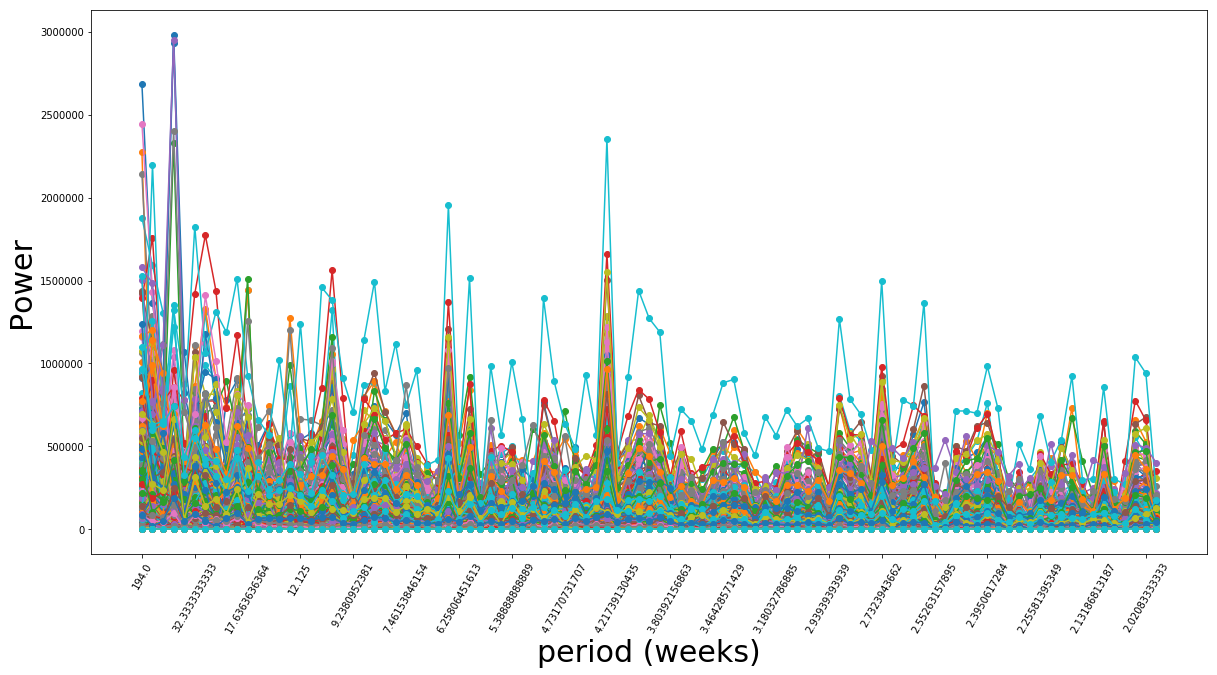

In [90]:
fig=pl.figure(figsize=(20, 10))
ax=fig.add_subplot(111)

for i in stations.keys():
    f = np.abs(np.fft.rfft(stations[i]))
    ax.plot(np.fft.rfftfreq(len(stations), 1.0)[1:], (f[1:]), 'o-')
    
ax.set_xticks(np.fft.rfftfreq(len(stations),1.0)[1:][::5])
ax.set_xticklabels(["%s"%(1/f) for f in np.fft.rfftfreq(len(stations),1.0)[1:][::5]], rotation=60)
pl.xlabel("period (weeks)", fontsize=30)
pl.ylabel("Power", fontsize=30)

##### Fig 2: plot for the period of card swipes in 600 subway stations in NYC

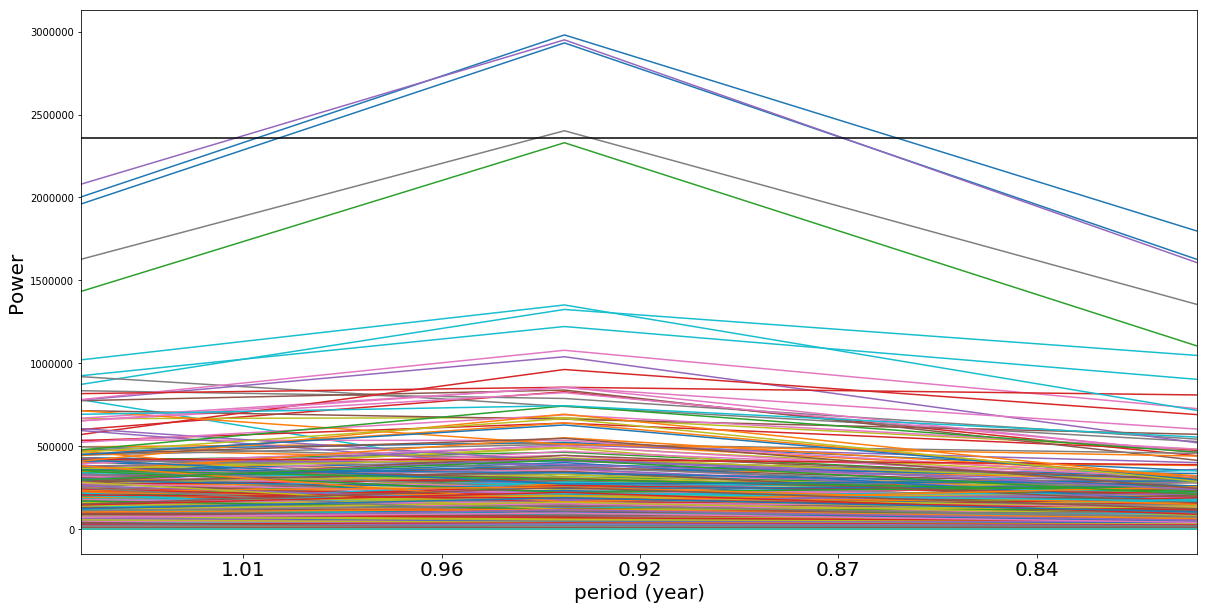

In [107]:
fig=pl.figure(figsize=(20,10))
ax=fig.add_subplot(111)
prominent = []
for i in stations.keys():
    f = np.abs(np.fft.rfft(stations[i]))
    #ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=20)
    ax.plot(np.fft.rfftfreq(len(stations), 1.0)[1:], (f[1:]), '-')
    if f[4] > 2.36e6:
        prominent.append(i)
ax.plot((1./60, 1./40), (2.36e6, 2.36e6), 'k-')
ax.set_xlim(1./55, 1./42)
ax.set_xticklabels([ "%.2f"%(1/52./f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (year)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("", fontsize=20)

##### Fig 3: Zoomed in plot for the period of card swipes in 600 subway stations in NYC, emphasizing the periodicity of 1 year

In [98]:
weeks

DatetimeIndex(['2010-05-21', '2010-05-28', '2010-06-04', '2010-06-11',
               '2010-06-18', '2010-06-25', '2010-07-02', '2010-07-09',
               '2010-07-16', '2010-07-23',
               ...
               '2013-12-20', '2013-12-27', '2014-01-03', '2014-01-10',
               '2014-01-17', '2014-01-24', '2014-01-31', '2014-02-07',
               '2014-02-14', '2014-02-21'],
              dtype='datetime64[ns]', length=197, freq='W-FRI')

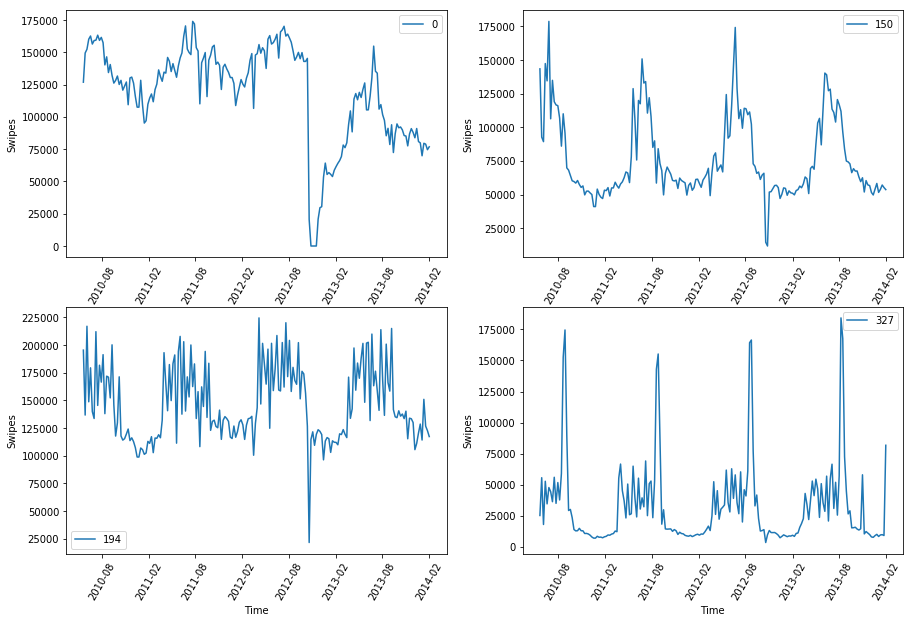

In [116]:
fig=pl.figure(figsize=(15,10))
n = 0
for i in prominent:
    n +=1
    fig.add_subplot(2, 2, n)
    pl.plot(weeks[:-3],stations[i],label=i)
    pl.xticks(rotation=60)
    pl.xlabel('Time')
    pl.ylabel('Swipes')
    pl.legend()

##### Fig 4: the 4 stations that has the most pominent annual Periodicity

## Extra Credit

In [108]:
tots = mtaRides.transpose(2,0,1).reshape(mtaRides.shape[2], mtaRides.shape[1]*mtaRides.shape[0]).T

In [109]:
tots = tots[tots.std(1)>0]

C:\Users\Hongkai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [111]:
vals = ((tots.T - tots.mean(1))/tots.std(1)).T

In [112]:
from sklearn.cluster import KMeans

In [119]:
km = KMeans(n_clusters=10, random_state=324)

In [121]:
res=km.fit(vals)
print(res.labels_)
print(res.labels_.shape)

[6 2 4 ..., 8 2 3]
(7660,)


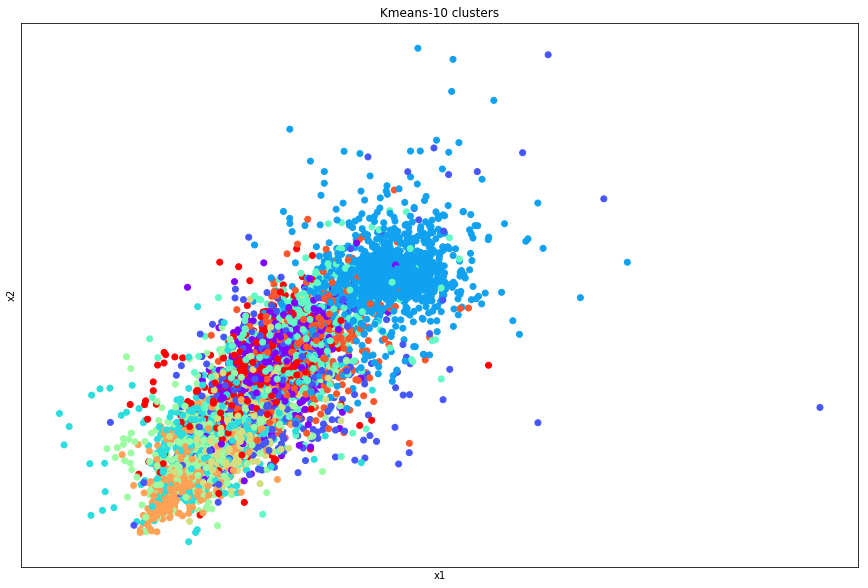

In [127]:
fig=pl.figure(figsize=(15,10))
pl.subplot(111)
pl.scatter(vals[:, 0], vals[:, 1], c=res.labels_, cmap= "rainbow_r")
pl.xlabel('x1')
pl.ylabel('x2')
pl.xticks(())
pl.yticks(())
pl.title("Kmeans-10 clusters")
pl.show()

## Task 1: 
### Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
### Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.


## Task 2: 
### Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)


## Task 3:
### Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)


## EXTRA CREDIT: Cluster. 
### Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis). 
### Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:

i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types

```
tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T
```

removing empty light curves

```
tots = tots[tots.std(1)>0]
```

with Kmeans you have to choose the number of clusters ahead km = 

```
KMeans(n_clusters=10)
```

and standardize the lightcurves before clustering. Notice: standardize, not whiten! If you have done clustering before you may have whitened the data: removed the variance by "column", here you want to remove the variance by "row". We will discuss this in the clustering lecture. 
```
vals = ((tots.T - tots.mean(1))/tots.std(1)).T
```

then you can run:

```
km.fit(vals)
```

In [2]:
#after reading the datacube you should see:
mtaRides.shape

(600, 23, 194)

# HINTS: 

## notes and hints: 

   1) you could coerce the data into a pandas dataframe, but the data is truly a "datacube": a 3D dataset, and flattening it into a pandas dataframe will make it far more difficult to manipulate. I strongly recommand you keep it as a numpy array
    
   2) note that the missing values are inputted as -1. if you want to do things like algebra (summing time series for example) you need to take care of that. If you replace the -1 entries with NaN, you may need to use functions that explicitly know how to deal with NaN: for example, to sum use the np.nansum etc
```
np.nanmean(mtarides)
np.nansum(mtarides)
```
as opposed to just 
```
np.mean(mtarides)
np.sum(mtarides)
```
 
## There are 600 stations, 23 card types. The trick to do this homework succesfully is to "collaps" (by averaging, or summing, depending on the question) the appropriate dimension in different parts of the homework: when you need to work at the station level (if I ask "which station is the one that..."), collaps the card type, when you need to work on the card type, collapse the stations. 

When I ask you "which station ...", you can sum or average over the ridership types for all station and reduce your data by a factor 23. When I ask you "which rideship type ..." you can sum or average over the stations and reduce your data by a factor 600! (or even better you could take a weighted average - *np.average(....weight=...)* -. The sum and average functions take an *axis* argument, which allows you to control which axis of the cube gets averaged. The dimension of the resulting object will allow you to check that you averaged over the right axis.


# Possibly useful functions

You are already familiar with and have already used  most of the functions I needed to perform this exercise. Here are some reminders and on few functions and methods that you may not have encountered yet which may be useful. You do not have to use them: there are many ways to do things and you do not have to solve this problem like I did, but here they are in case you need some help:

* the numpy function np.where() returns the index where a condition is true. It is slow and inefficient but very intuitive and convenient


* the nupy functions np.nansum(), np.sum(), np.nanmean() etc take an array and the axis along which to sum as inputs. If you want to sum over stations, or over rides, you can use these passing the appropriate axis number: axis=1 axis=2...


* to find periodicity you can use fourier transforms. Look at the notebook on fourier transforms in https://github.com/fedhere/UInotebooks/tree/master/timeseries. If you choose to use the numpy package you may want to use the real fft function:  np.fft.rfft()  

```
np.fft.rfft(mydata) 
```  

      will return the *real* part of the fourier transform (the fourier transform is a *complex* object, and therefore it has a real and an *imaginary* component - that is just math; all you need to know is that you need the real part). But what you want is its absolute value: np.abs(). 
      To plot the fourier transform you may want the x-axis to be in frequency. To get the x-axis of your plot in frequency (1/week since the data is in weeks) you can use the function 

```
np.fft.rfftfreq(N, d) 
```     
     which takes as arguments N = the length of your time series (the number of datapoints) and d: the *sample spacing*, or 1.0/sampling_rate (in this case, with 1/week sampling, if you want the freq in units of week that is just 1!)


*  the array methods 
```
np.array.flatten()
np.array.reshape()
```
     allow you to manipulate the shape of an array, for example if you want to run analysis on each individual time series, each station and each ridership type, which I recommand if you want to work on clustering for extra credit (resulting into 600*23=13800 time series) you can flatten the array as
     
```
mtaarray.flatten()
```

    which returns the flatten array:

```
mtaRides = np.load("MTA_Fare.npy")

mtaRides.shape
Out[10]: (600, 23, 194)

mtaRides.flatten().shape
Out[11]: (2677200,)
````

*  after you operate on the array to collapse an axis, always check the dimensionality to assure you have indeed collapsed the right axis! see cell below

```
import numpy as np
data = np.random.rand(100,10)

print(data.shape)
Out[12]: (100, 10)

print(data.mean())
Out[13]:  0.4902457782

print(data.mean(axis=0).shape, data.mean(axis=1).shape)
Out[14]: (10,) (100,)

```

ride types list

## NOTE ON THE TREND DETECTION:
### you should find the *card type* that has the steepest increase, and the steepest decrease. Notice: we are looking for something that has a more or less constant trend

### to do this you can sum or average (a weighted average is probably best) over all stations, leaving you with 23 time series, one per ridership type. 

### you can use a rolling mean for smoothing (pd.rolling_mean() for example), and you can calculate the ratio of the *number of rides* near the beginning to the *number of rides* near the end of the time series.

### notice that you should inspect the time series, algorithmically or at least by eye, to ensure you see a trend, and not just changing structure. Below is an example of a lightcurve with structure (top) and a lightcurve with a constant trend (bottom) both showing a large deviation between the beginning and the end of the time series

std: 153167.095823 
flux ratio beginning to end 1.53960256599
std: 33307.6081244 
flux ratio beginning to end 0.378670623705


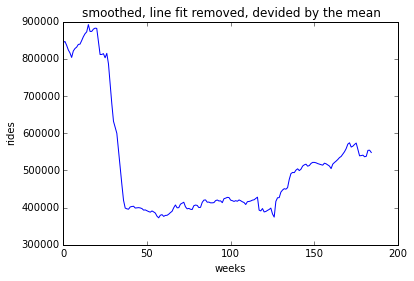

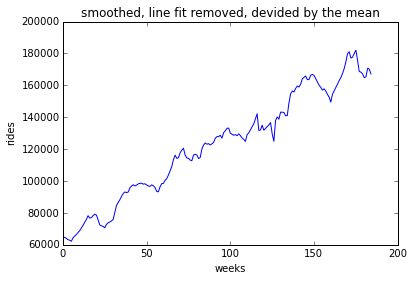

to determine if there is a trend or strucutre you can inspect the time series visually, since there are only 23!
an alternative, algorithmic way to do it, is to fit a line to the (smoothed) time series  and look at the residuals.

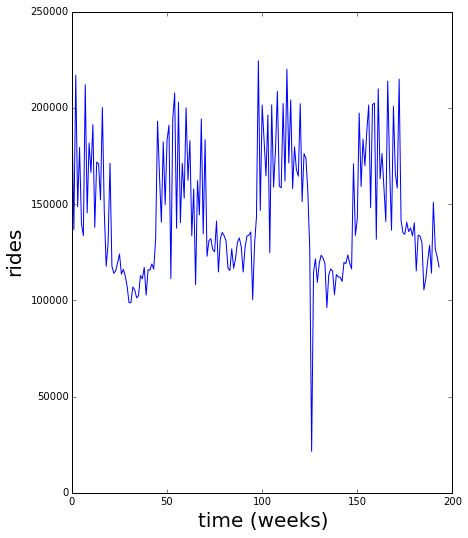

In [63]:
#and here is one of he periodic time series you should find by identifying the time series with the most power 
#at 1/52 weeks frequency in fourier space